In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import text 
import re
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB # Naive Bayes model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


data = pd.read_csv("/Users/hshah/Desktop/gender-classifier-DFE-791531.csv", encoding='latin1')
data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


In [2]:
data.description = data.description.fillna('')

In [3]:
def cleaning(s):
    
    s = str(s) #s.encode('utf-8').strip()
    s = s.lower()
    s = re.sub('\s\W',' ',s) 
    s = re.sub('\W,\s',' ',s) 
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", " ", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', ' ', s) 
    s = s.replace("co"," ")
    s = s.replace("https"," ")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

data['text_norm'] = [cleaning(s) for s in data['text']]
data['gender_norm'] = [cleaning(s) for s in data['gender']]
data['tweet_norm'] = [cleaning(s) for s in data['description']]
data['color_norm'] = [cleaning(s) for s in data['sidebar_color']]

print (data['tweet_norm'].head(),'/n')
print(data['text_norm'].head())

0                                i sing my own rhythm 
1    i m the author of novels filled with family dr...
2                  louis whining and squealing and all
3    mobile guy ers shazam google kleiner perkins y...
4    ricky wilson the best frontman kaiser chiefs t...
Name: tweet_norm, dtype: object /n
0    robbie e responds to critics after win against...
1     ûïit felt like they were my friends and i was...
2    i absolutely adore when louis starts the songs...
3    hi jordanspieth looking at the url do you use ...
4    watching neighbours on sky catching up with th...
Name: text_norm, dtype: object


In [4]:
df = data[data['gender:confidence']==1]
df.shape

(13926, 30)

In [5]:
df=df[df['gender'].isin(['female', 'male'])]
df['gender'].value_counts()



female    5367
male      4653
Name: gender, dtype: int64

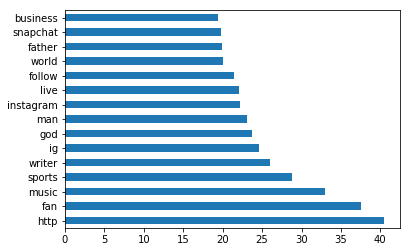

In [6]:
male=df[df['gender']=='male']
cvec = TfidfVectorizer(min_df=1, stop_words = text.ENGLISH_STOP_WORDS.union(['life','just','don','love','new','pepole','know','good','got','amp','like','ll','ve','time','uld','ùõ','im']))
cvec.fit(male['tweet_norm'])
X_train2 = pd.DataFrame(cvec.transform(male['tweet_norm']).todense(),
                       columns=cvec.get_feature_names())
word_counts = X_train2.sum(axis=0)
df4 = pd.DataFrame(word_counts.sort_values(ascending = False))
aa1 = df4.iloc[1020:1040]
# aa.plot.barh()
#word_counts.sort_values(ascending = False).head(20)
word_counts.sort_values(ascending = False).head(15).plot.barh()

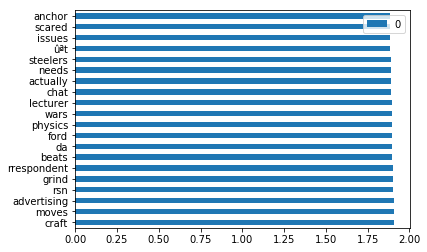

In [7]:
aa1.plot.barh()

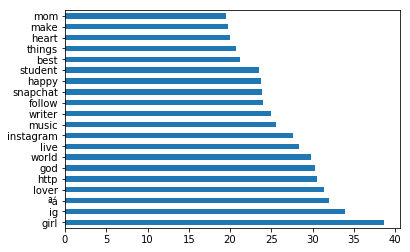

In [8]:
female=df[df['gender']=='female']
cvec = TfidfVectorizer(min_df=1, stop_words = text.ENGLISH_STOP_WORDS.union(['life','just','don','love','new','pepole','know','good','got','sc','amp','like','ll','ve','time','uld','ùõ','im']))
cvec.fit(female['tweet_norm'])
X_train2 = pd.DataFrame(cvec.transform(female['tweet_norm']).todense(),
                       columns=cvec.get_feature_names())
word_counts = X_train2.sum(axis=0)
df4 = pd.DataFrame(word_counts.sort_values(ascending = False))
aa = df4.iloc[900:920]

# print (word_counts.sort_values(ascending = False).tail(20))
word_counts.sort_values(ascending = False).head(20).plot.barh()
# word_counts.sort_values(ascending = False).trail(15).plot.barh()

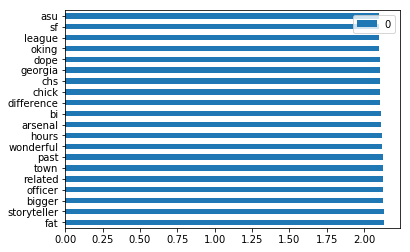

In [9]:
aa.plot.barh()

In [10]:
df1 = df[['gender_norm','tweet_norm','text_norm','color_norm']]
df1.head()



,gender_norm,tweet_norm,text_norm,color_norm
0,male,i sing my own rhythm,robbie e responds to critics after win against...,ffffff
1,male,i m the author of novels filled with family dr...,ûïit felt like they were my friends and i was...,c deed
3,male,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking at the url do you use ...,c deed
4,female,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with th...,
5,female,you don t know me,ive seen people on the train with lamps chairs...,


In [11]:
len(df1[df1.gender_norm=='male'])

4653

In [12]:
df1.loc[df1["gender_norm"]=='male',"gender_norm"] = 1
df1.loc[df1["gender_norm"]=='female',"gender_norm"] = 0

//anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
df1.head()

,gender_norm,tweet_norm,text_norm,color_norm
0,1,i sing my own rhythm,robbie e responds to critics after win against...,ffffff
1,1,i m the author of novels filled with family dr...,ûïit felt like they were my friends and i was...,c deed
3,1,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking at the url do you use ...,c deed
4,0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with th...,
5,0,you don t know me,ive seen people on the train with lamps chairs...,


In [14]:
df1_x = df1["tweet_norm"]
df1_y = df1["gender_norm"]
df1_z = df1["text_norm"]
df1_a =df1["color_norm"]

In [15]:

cv = TfidfVectorizer(min_df=1, stop_words = 'english')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.3, random_state=8)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(7014,)
(3006,)
(7014,)
(3006,)


In [17]:
x_traincv = cv.fit_transform(X_train).todense()
x_traincv

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
X_train.iloc[0]

'kig family artist host  cky lovable cunt instagram spicefromearly pattern squad kig click the link in my bio watch my new video'

In [19]:
mnb = MultinomialNB()


In [20]:
y_train=y_train.astype('int')

In [21]:
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
x_testcv = cv.transform(X_test)
# y_testcv = cv.transform(y_test)
pred = mnb.predict(x_testcv)

In [23]:
pred

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
pre = np.array(y_test)

In [25]:
pre

array([0, 0, 0, ..., 1, 0, 0], dtype=object)

In [26]:
count = 0 
for i in range(len(pred)):
    if pred[i] == pre[i]:
        count = count +1
        

In [27]:
count

2036

In [28]:
len(pred)

3006

In [29]:
count/len(pred)

0.6773120425815037

In [30]:
X_test.iloc[1000]

' imma star '

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [32]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = AdaBoostClassifier(n_estimators=100)
mnb = MultinomialNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('add', clf4)], voting='hard')

In [33]:
clf1.fit(x_traincv,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_predict_lr = clf1.predict(x_testcv)
y_predict_prob_lr = clf1.predict_proba(x_testcv)
print(y_predict_lr)
print(y_predict_prob_lr)

[0 0 0 ..., 1 1 1]
[[ 0.52805451  0.47194549]
 [ 0.64167866  0.35832134]
 [ 0.66925378  0.33074622]
 ..., 
 [ 0.25972146  0.74027854]
 [ 0.37560013  0.62439987]
 [ 0.40970496  0.59029504]]


In [35]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(pre, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[  0.00000000e+00   0.00000000e+00   6.21504040e-04 ...,   9.97513984e-01
   9.97513984e-01   1.00000000e+00]




[  7.15819613e-04   1.86113099e-02   1.86113099e-02 ...,   9.99284180e-01
   1.00000000e+00   1.00000000e+00]


In [36]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.730333089685


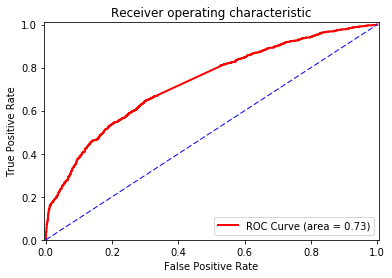

In [ ]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
from sklearn import cross_validation

for clf, label in zip([clf1, clf2, clf4, eclf], ['Logistic Regression', 'Random Forest', 'AdaBoost','essemble']):

    scores = cross_validation.cross_val_score(clf,x_traincv,y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.66 (+/- 0.02) [Logistic Regression]
Accuracy: 0.62 (+/- 0.02) [Random Forest]
